# References
- Precision is the percentage of predicted positives that were correctly classified; TP / (TP + FP)
- Recall is the percentage of actual positives that were correctly classified; TP / (TP + FN)
- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
- https://alexlenail.me/NN-SVG/index.html

# Import necessary modules

In [1]:
# For data processing
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# For progress bar
from tqdm import tqdm

# For handling json files
import json

# Helper functions

In [2]:
def create_model(hidden_layer_units, input_dim, dropout=False, dropout_rate=0.2, model_name='model'):
    """
    Creates a neural network classifier model with:
        - l hidden layers, where l is len(hidden_layer_units)
        - hidden_layer_units[i] units for i'th layer
        - Binary Crossentropy loss
        - Adam optimizer
        - Accuracy, precision, and recall metrics
        - Dropout in each layer (optional)
        - Model name model_name
    
    Returns the compiled model.
    """
    
    model = Sequential(name=model_name)
    
    # Input layer
    model.add(Dense(hidden_layer_units[0], 
                    activation='relu', 
                    input_dim=input_dim,
                    name='Dense_1'))
    
    if dropout == True:
        model.add(Dropout(dropout_rate, name='Dropout_1'))    
    
    # Add the hidden layers
    l = 2
    for units in hidden_layer_units[1:]:
        model.add(Dense(units, activation='relu', name=f'Dense_{l}'))
        l += 1
        
        if dropout == True:
            model.add(Dropout(dropout_rate, name=f'Dropout_{l}'))
    
    # Output layer (sigmoid outputs [0, 1])
    model.add(Dense(1, activation='sigmoid', name='Output'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', 
                  metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])
    
    return model


def visualize_performance(y_train, y_train_pred, y_test, y_test_pred):
    """
    Creates a confusion matrix visualization for train and test set
    using heatmap with added information such as:
        - Accuracy
        - Precision
        - Recall
        - F1 score
        
    Returns the accuracy, precision, recall, and F1 score from test set.
    """
    
    f, ax = plt.subplots(ncols=2, figsize=(14, 4))
    f.suptitle('Training vs Test Performance', fontweight='bold', fontsize='x-large')
    
    # Training set
    cf_train = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(cf_train, fmt='.0f', annot=True, ax=ax[0])
    
    # Calculate metrics
    accuracy_train = np.trace(cf_train) / float(np.sum(cf_train))
    precision_train = cf_train[1,1] / sum(cf_train[:,1])
    recall_train = cf_train[1,1] / sum(cf_train[1,:])
    f1_score_train = 2 * precision_train * recall_train / (precision_train + recall_train)
    
    stats_text_train = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
        accuracy_train, precision_train, recall_train, f1_score_train)
    
    ax[0].set(xlabel='Predicted' + stats_text_train, 
              ylabel='Actual', title='Training Performance')
    
    # Test set
    cf_test = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cf_test, fmt='.0f', annot=True, ax=ax[1])
    
    # Calculate metrics
    accuracy_test = np.trace(cf_test) / float(np.sum(cf_test))
    precision_test = cf_test[1,1] / sum(cf_test[:,1])
    recall_test = cf_test[1,1] / sum(cf_test[1,:])
    f1_score_test = 2 * precision_test * recall_test / (precision_test + recall_test)
    
    stats_text_test = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
        accuracy_test, precision_test, recall_test, f1_score_test)
    
    ax[1].set(xlabel='Predicted' + stats_text_test, 
              ylabel='Actual', title='Test Performance')
    
    plt.show()
    
    return accuracy_test, precision_test, recall_test, f1_score_test


def test_performance(y_test, y_test_pred):
    """ 
    Returns the accuracy, precision, recall, and F1 score from test set.
    """

    # Test set
    cf_test = confusion_matrix(y_test, y_test_pred)
    
    # Calculate metrics
    accuracy_test = np.trace(cf_test) / float(np.sum(cf_test))
    precision_test = cf_test[1,1] / sum(cf_test[:,1])
    recall_test = cf_test[1,1] / sum(cf_test[1,:])
    f1_score_test = 2 * precision_test * recall_test / (precision_test + recall_test)
    
    return accuracy_test, precision_test, recall_test, f1_score_test


def visualize_training_history(history):
    """
    Creates a visualization of model's training process that contains:
        - Loss
        - Accuracy
        - Precision
        - Recall
    """
    f, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
    f.suptitle('Training History', fontweight='bold', fontsize='x-large')
    
    ax[0][0].plot(history.history['loss'], label='Loss (training data)')
    ax[0][0].set_title('Loss History')
    ax[0][0].set(ylabel='Loss', xlabel='Number of Epochs')
    ax[0][0].legend(loc="upper right")

    ax[0][1].plot(history.history['accuracy'], label='Accuracy (training data)')
    ax[0][1].set_title('Accuracy History')
    ax[0][1].set(ylabel='Loss', xlabel='Number of Epochs')
    ax[0][1].legend(loc="lower right")    
    
    ax[1][0].plot(history.history['precision'], label='Precision (training data)')
    ax[1][0].set_title('Precision History')
    ax[1][0].set(ylabel='Precision', xlabel='Number of Epochs')
    ax[1][0].legend(loc="lower right")
        
    ax[1][1].plot(history.history['recall'], label='Recall (training data)')
    ax[1][1].set_title('Recall History')
    ax[1][1].set(ylabel='Precision', xlabel='Number of Epochs')
    ax[1][1].legend(loc="lower right")

    
def visualize_multiple_training_histories(training_histories):
    """
    Creates a visualization of training histories from different resampling methods.
    
    Input: dictionary (key -> metric, value -> history callback)
    """
    
    
    f, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
    f.suptitle('Training Histories Between Different Resampling Methods'
               , fontweight='bold', fontsize='x-large')
    
    # Set title and labels for each axis
    ax[0][0].set_title('Loss History')
    ax[0][0].set(ylabel='Loss', xlabel='Number of Epochs')

    ax[1][0].set_title('Precision History')
    ax[1][0].set(ylabel='Precision', xlabel='Number of Epochs')

    ax[0][1].set_title('Accuracy History')
    ax[0][1].set(ylabel='Loss', xlabel='Number of Epochs')

    ax[1][1].set_title('Recall History')
    ax[1][1].set(ylabel='Precision', xlabel='Number of Epochs')
    
    # Plotting data
    for metric, cb in training_histories.items():
        ax[0][0].plot(cb.history['loss'], label=metric)
        ax[0][0].legend(loc="upper right")
        
        ax[0][1].plot(cb.history['accuracy'], label=metric)
        ax[0][1].legend(loc="lower right")
        
        ax[1][0].plot(cb.history['precision'], label=metric)
        ax[1][0].legend(loc="lower right")
        
        ax[1][1].plot(cb.history['recall'], label=metric)
        ax[1][1].legend(loc="lower right")
        
    plt.show()
    

def visualize_tests_performance(tests_performance):
    """
    Display 4 barplots comparing:
        - Accuracy
        - Precision
        - Recall
        - F1 Score
    on test sets between different resampling methods.
    """
    
    f, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
    f.suptitle('Tests Performance Between Different Resampling Methods'
               , fontweight='bold', fontsize='x-large')
    
    i = 0
    for metric, ls in tests_performance.items():
        # Takes the labels
        x = pd.DataFrame(ls).T.iloc[0].to_list()
        # Takes the values
        y = pd.DataFrame(ls).T.iloc[1].to_list()
        
        plot = sns.barplot(x=x, y=y, ax=ax[i // 2][i % 2])
        
        # Show the actual numbers on the barplots
        for p in plot.patches:
            plot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', 
                           va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')
        
        ax[i // 2][i % 2].set(title=metric)
        ax[i // 2][i % 2].set_ylim(0, 1)
        
        i += 1
    
    plt.show()
    

def standardize(X_train, X_test):
    """
    Standardize the inputs of the train and test set.
    
    Returns the standardized inputs.
    """
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    return X_train_std, X_test_std


def repeat_train_and_test(iterations=50):
    
    template = {'Original': 0, 'Oversampling': 0, 'SMOTETomek': 0, 'SMOTEENN': 0}
    # To count the winners for each metric in all iterations
    winner_count = {'Test Accuracy': template.copy(), 
                    'Test Precision': template.copy(), 
                    'Test Recall': template.copy(), 
                    'Test F1 Score': template.copy()}
    
    for i in tqdm(range(iterations)):
        # To store the values of each metric in a single iteration
        tests_performance = {'Test Accuracy': [], 
                             'Test Precision': [], 
                             'Test Recall': [], 
                             'Test F1 Score': []}

        ## 1. First Model (Original)

        # Import and prepare dataset
        train_df = pd.read_csv('datasets/train.csv', index_col=0)
        train_df = train_df.drop(columns=['decade_released', 'genres', 'revenue'])

        test_df = pd.read_csv('datasets/test.csv', index_col=0)
        test_df = test_df.drop(columns=['decade_released', 'genres', 'revenue'])

        # Split into X and y
        X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
        X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

        # Standardize inputs
        X_train, X_test = standardize(X_train, X_test)

        # Create NN model
        model = create_model([16, 16, 16], input_dim=len(X_train[0]), model_name='original-model')

        # Model training
        history = model.fit(X_train, y_train, batch_size=16, epochs=100, verbose=0)
        training_histories['Original'] = history

        # Model performance on train and test set
        y_train_pred = (model.predict(X_train) >= 0.5).astype('int64')
        y_test_pred = (model.predict(X_test) >= 0.5).astype('int64')

        accuracy, precision, recall, f1_score = test_performance(y_test, y_test_pred)

        tests_performance['Test Accuracy'].append(('Original', accuracy))
        tests_performance['Test Precision'].append(('Original', precision))
        tests_performance['Test Recall'].append(('Original', recall))
        tests_performance['Test F1 Score' ].append(('Original', f1_score))

        
        ## 2. Second Model (Oversampling)

        # Import and prepare dataset
        train_df = pd.read_csv('datasets/oversampled-train.csv', index_col=0)
        train_df = train_df.drop(columns=['decade_released', 'genres', 'revenue'])

        test_df = pd.read_csv('datasets/test.csv', index_col=0)
        test_df = test_df.drop(columns=['decade_released', 'genres', 'revenue'])

        # Split into X and y
        X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
        X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

        # Standardize inputs
        X_train, X_test = standardize(X_train, X_test)

        # Create NN model
        model = create_model([16, 16, 16], input_dim=len(X_train[0]), model_name='oversampling-model')

        # Model training
        history = model.fit(X_train, y_train, batch_size=16, epochs=100, verbose=0)
        training_histories['Oversampling'] = history

        # Model performance on train and test sets
        y_train_pred = (model.predict(X_train) >= 0.5).astype('int64')
        y_test_pred = (model.predict(X_test) >= 0.5).astype('int64')

        accuracy, precision, recall, f1_score = test_performance(y_test, y_test_pred)

        tests_performance['Test Accuracy'].append(('Oversampling', accuracy))
        tests_performance['Test Precision'].append(('Oversampling', precision))
        tests_performance['Test Recall'].append(('Oversampling', recall))
        tests_performance['Test F1 Score' ].append(('Oversampling', f1_score))

        ## 3. Third Model (SMOTETomek Resampling)

        # Import and prepare dataset
        train_df = pd.read_csv('datasets/smotetomek-train.csv', index_col=0)
        train_df = train_df.drop(columns=['revenue'])

        test_df = pd.read_csv('datasets/test.csv', index_col=0)
        test_df = test_df.drop(columns=['decade_released', 'genres', 'revenue'])

        # Split into X and y
        X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
        X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

        # Standardize inputs
        X_train, X_test = standardize(X_train, X_test)

        # Create NN model
        model = create_model([16, 16, 16], input_dim=len(X_train[0]), model_name='smotetomek-model')

        # Model training
        history = model.fit(X_train, y_train, batch_size=16, epochs=100, verbose=0)
        training_histories['SMOTETomek'] = history


        # Model performance on train and test set
        y_train_pred = (model.predict(X_train) >= 0.5).astype('int64')
        y_test_pred = (model.predict(X_test) >= 0.5).astype('int64')

        accuracy, precision, recall, f1_score = test_performance(y_test, y_test_pred)
        
        tests_performance['Test Accuracy'].append(('SMOTETomek', accuracy))
        tests_performance['Test Precision'].append(('SMOTETomek', precision))
        tests_performance['Test Recall'].append(('SMOTETomek', recall))
        tests_performance['Test F1 Score' ].append(('SMOTETomek', f1_score))

        ## 4. Fourth Model (SMOTEENN Resampling)

        # Import and prepare dataset
        train_df = pd.read_csv('datasets/smoteenn-train.csv', index_col=0)
        train_df = train_df.drop(columns=['revenue'])

        test_df = pd.read_csv('datasets/test.csv', index_col=0)
        test_df = test_df.drop(columns=['decade_released', 'genres', 'revenue'])

        # Split into X and y
        X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
        X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

        # Standardize inputs
        X_train, X_test = standardize(X_train, X_test)

        # Create NN model
        model = create_model([16, 16, 16], input_dim=len(X_train[0]),
                             model_name='smoteenn-model')

        # Model training
        history = model.fit(X_train, y_train, batch_size=16, epochs=100, verbose=0)
        training_histories['SMOTEENN'] = history

        # Model performance on train and test set
        y_train_pred = (model.predict(X_train) >= 0.5).astype('int64')
        y_test_pred = (model.predict(X_test) >= 0.5).astype('int64')

        accuracy, precision, recall, f1_score = test_performance(y_test, y_test_pred)

        tests_performance['Test Accuracy'].append(('SMOTEENN', accuracy))
        tests_performance['Test Precision'].append(('SMOTEENN', precision))
        tests_performance['Test Recall'].append(('SMOTEENN', recall))
        tests_performance['Test F1 Score' ].append(('SMOTEENN', f1_score))
        
        # Find the winners for all metrics
        for metric, ls in tests_performance.items():
            # Get the resampling method name that has the maximum value
            winner_name = max(map(lambda x: x[::-1], ls))[1]
            winner_count[metric][winner_name] += 1
            
    return winner_count


def visualize_winner_count(winner_count):
    """
    Displays 4 barplots containing how many times does each resampling method
    did the best compared to other methods after multiple iterations for each metric.
    """

    f, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    f.suptitle('Number of Wins Between Different Resampling Methods After Multiple Iterations'
               , fontweight='bold', fontsize='x-large')

    i = 0
    for metric, count in winner_count.items():
        # Takes the labels
        x = list(count.keys())
        # Takes the values
        y = list(count.values())

        plot = sns.barplot(x=x, y=y, ax=ax[i // 2][i % 2])
        for p in plot.patches:
            plot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', 
                           va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')

        ax[i // 2][i % 2].set(title=f'{metric} Win Count', ylabel='Win Count')
        ax[i // 2][i % 2].set_ylim(0, 110)

        i += 1

    plt.show()

# Model training

In [3]:
# To store training histories of different resampling methods
training_histories = {}
tests_performance = {'Test Accuracy': [], 
                     'Test Precision': [], 
                     'Test Recall': [], 
                     'Test F1 Score': []}

## 1. First Model (Original)

### Data preparation

In [4]:
# Import and prepare dataset
train_df = pd.read_csv('datasets/train.csv', index_col=0)
train_df = train_df.drop(columns=['decade_released', 'genres', 'revenue'])

test_df = pd.read_csv('datasets/test.csv', index_col=0)
test_df = test_df.drop(columns=['decade_released', 'genres', 'revenue'])

# Split into X and y
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

# Standardize inputs
X_train, X_test = standardize(X_train, X_test)

### Create model

In [5]:
# Create NN model
model = create_model([16, 16, 16], input_dim=len(X_train[0]), model_name='original-model')
model.summary()

Model: "original-model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 16)                96        
_________________________________________________________________
Dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
Dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
Output (Dense)               (None, 1)                 17        
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________


### Model training

In [6]:
history = model.fit(X_train, y_train, batch_size=16, epochs=100)

# Save training history
training_histories['Original'] = history

Epoch 1/100
310/310 [==============================] - 1s 1ms/step - loss: 0.5498 - accuracy: 0.7833 - precision: 0.4016 - recall: 0.0576
Epoch 2/100
310/310 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8221 - precision: 0.7205 - recall: 0.2263
Epoch 3/100
310/310 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.8134 - precision: 0.7052 - recall: 0.2753
Epoch 4/100
310/310 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.8127 - precision: 0.6265 - recall: 0.2599
Epoch 5/100
310/310 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.8248 - precision: 0.6969 - recall: 0.3094
Epoch 6/100
310/310 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8264 - precision: 0.6720 - recall: 0.3039
Epoch 7/100
310/310 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.8183 - precision: 0.6721 - recall: 0.2984
Epoch 8/100
310/310 [=============

310/310 [==============================] - 0s 1ms/step - loss: 0.3944 - accuracy: 0.8285 - precision: 0.6775 - recall: 0.3059
Epoch 61/100
310/310 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8253 - precision: 0.6865 - recall: 0.2973
Epoch 62/100
310/310 [==============================] - 0s 1ms/step - loss: 0.3909 - accuracy: 0.8297 - precision: 0.6815 - recall: 0.3219
Epoch 63/100
310/310 [==============================] - 0s 1ms/step - loss: 0.3861 - accuracy: 0.8384 - precision: 0.7201 - recall: 0.3337
Epoch 64/100
310/310 [==============================] - 0s 1ms/step - loss: 0.3912 - accuracy: 0.8320 - precision: 0.7094 - recall: 0.3242
Epoch 65/100
310/310 [==============================] - 0s 1ms/step - loss: 0.3892 - accuracy: 0.8339 - precision: 0.7136 - recall: 0.3065
Epoch 66/100
310/310 [==============================] - 0s 1ms/step - loss: 0.4074 - accuracy: 0.8189 - precision: 0.6687 - recall: 0.2877
Epoch 67/100
310/310 [==================

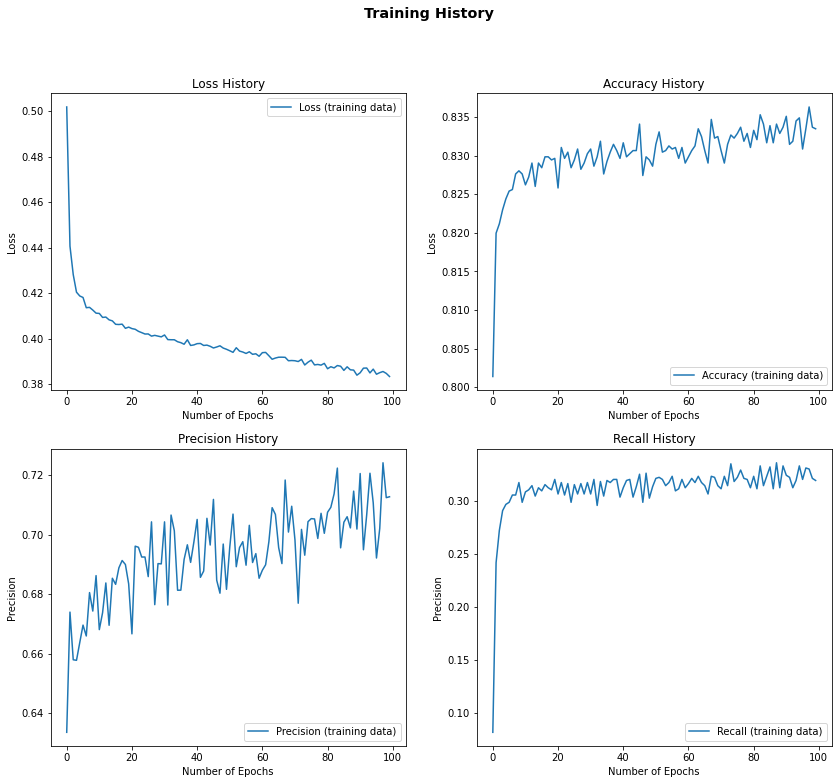

In [7]:
visualize_training_history(history)

### Model performance on train and test set

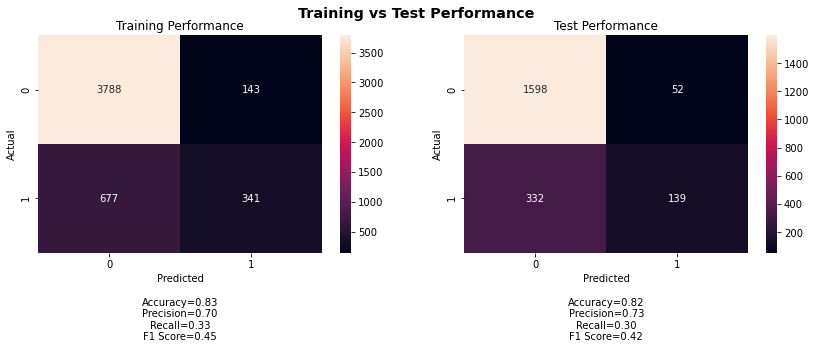

In [8]:
# Change probabilities to 0s and 1s
y_train_pred = (model.predict(X_train) >= 0.5).astype('int64')
y_test_pred = (model.predict(X_test) >= 0.5).astype('int64')

accuracy, precision, recall, f1_score = visualize_performance(y_train, y_train_pred, 
                                                              y_test, y_test_pred)

# Save values
tests_performance['Test Accuracy'].append(('Original', accuracy))
tests_performance['Test Precision'].append(('Original', precision))
tests_performance['Test Recall'].append(('Original', recall))
tests_performance['Test F1 Score' ].append(('Original', f1_score))

## 2. Second Model (Oversampling)

### Data preparation

In [9]:
# Import and prepare dataset
train_df = pd.read_csv('datasets/oversampled-train.csv', index_col=0)
train_df = train_df.drop(columns=['decade_released', 'genres', 'revenue'])

test_df = pd.read_csv('datasets/test.csv', index_col=0)
test_df = test_df.drop(columns=['decade_released', 'genres', 'revenue'])

# Split into X and y
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

# Standardize inputs
X_train, X_test = standardize(X_train, X_test)

### Create model

In [10]:
model = create_model([16, 16, 16], input_dim=len(X_train[0]), model_name='oversampling-model')
model.summary()

Model: "oversampling-model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 16)                96        
_________________________________________________________________
Dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
Dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
Output (Dense)               (None, 1)                 17        
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________


### Model training

In [11]:
history = model.fit(X_train, y_train, batch_size=16, epochs=100)
training_histories['Oversampling'] = history

Epoch 1/100
369/369 [==============================] - 1s 1ms/step - loss: 0.6250 - accuracy: 0.6791 - precision: 0.5697 - recall: 0.3019
Epoch 2/100
369/369 [==============================] - 0s 1ms/step - loss: 0.5235 - accuracy: 0.7408 - precision: 0.7098 - recall: 0.3775
Epoch 3/100
369/369 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.7390 - precision: 0.6758 - recall: 0.4247
Epoch 4/100
369/369 [==============================] - 0s 1ms/step - loss: 0.5084 - accuracy: 0.7516 - precision: 0.6952 - recall: 0.4410
Epoch 5/100
369/369 [==============================] - 0s 1ms/step - loss: 0.5147 - accuracy: 0.7482 - precision: 0.6895 - recall: 0.4503
Epoch 6/100
369/369 [==============================] - 0s 1ms/step - loss: 0.4923 - accuracy: 0.7561 - precision: 0.7025 - recall: 0.4809
Epoch 7/100
369/369 [==============================] - 0s 1ms/step - loss: 0.5077 - accuracy: 0.7485 - precision: 0.6867 - recall: 0.4522
Epoch 8/100
369/369 [=============

369/369 [==============================] - 1s 2ms/step - loss: 0.4645 - accuracy: 0.7783 - precision: 0.7444 - recall: 0.5180
Epoch 61/100
369/369 [==============================] - 1s 2ms/step - loss: 0.4680 - accuracy: 0.7863 - precision: 0.7493 - recall: 0.5439
Epoch 62/100
369/369 [==============================] - 1s 1ms/step - loss: 0.4522 - accuracy: 0.7841 - precision: 0.7281 - recall: 0.5622
Epoch 63/100
369/369 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.7899 - precision: 0.7620 - recall: 0.5382
Epoch 64/100
369/369 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.7767 - precision: 0.7425 - recall: 0.5411
Epoch 65/100
369/369 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.7801 - precision: 0.7394 - recall: 0.5601
Epoch 66/100
369/369 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.7816 - precision: 0.7470 - recall: 0.5509
Epoch 67/100
369/369 [==================

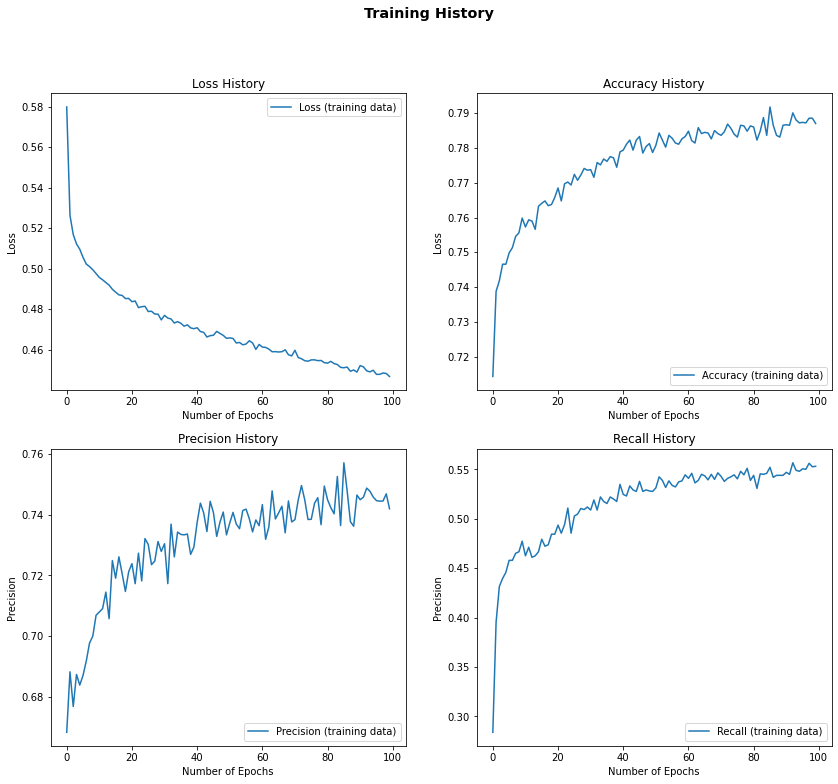

In [12]:
visualize_training_history(history)

### Model performance on train and test sets

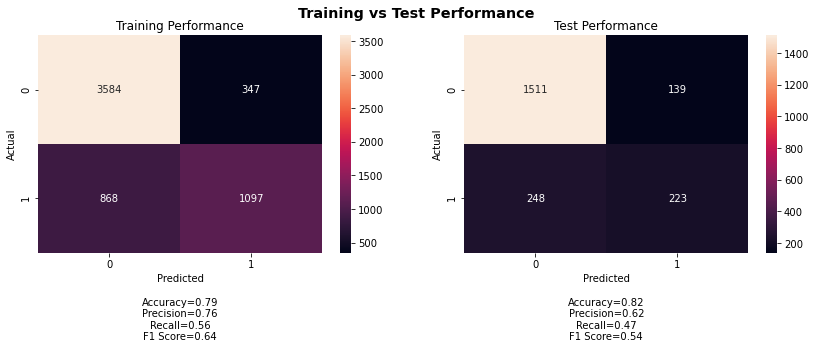

In [13]:
# Change probabilities to 0s and 1s
y_train_pred = (model.predict(X_train) >= 0.5).astype('int64')
y_test_pred = (model.predict(X_test) >= 0.5).astype('int64')

accuracy, precision, recall, f1_score = visualize_performance(y_train, y_train_pred, 
                                                              y_test, y_test_pred)

# Save values
tests_performance['Test Accuracy'].append(('Oversampling', accuracy))
tests_performance['Test Precision'].append(('Oversampling', precision))
tests_performance['Test Recall'].append(('Oversampling', recall))
tests_performance['Test F1 Score' ].append(('Oversampling', f1_score))

## 3. Third Model (SMOTETomek Resampling)

### Data preparation

In [14]:
# Import and prepare dataset
train_df = pd.read_csv('datasets/smotetomek-train.csv', index_col=0)
train_df = train_df.drop(columns=['revenue'])

test_df = pd.read_csv('datasets/test.csv', index_col=0)
test_df = test_df.drop(columns=['decade_released', 'genres', 'revenue'])

# Split into X and y
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

# Standardize inputs
X_train, X_test = standardize(X_train, X_test)

### Create model

In [15]:
model = create_model([16, 16, 16], input_dim=len(X_train[0]), model_name='smotetomek-model')
model.summary()

Model: "smotetomek-model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 16)                96        
_________________________________________________________________
Dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
Dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
Output (Dense)               (None, 1)                 17        
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________


### Model training

In [16]:
history = model.fit(X_train, y_train, batch_size=16, epochs=100)
training_histories['SMOTETomek'] = history

Epoch 1/100
429/429 [==============================] - 1s 1ms/step - loss: 0.6514 - accuracy: 0.6079 - precision: 0.6410 - recall: 0.5677
Epoch 2/100
429/429 [==============================] - 1s 1ms/step - loss: 0.5482 - accuracy: 0.7176 - precision: 0.7388 - recall: 0.6742
Epoch 3/100
429/429 [==============================] - 1s 1ms/step - loss: 0.5324 - accuracy: 0.7296 - precision: 0.7445 - recall: 0.6978
Epoch 4/100
429/429 [==============================] - 1s 2ms/step - loss: 0.5201 - accuracy: 0.7357 - precision: 0.7562 - recall: 0.6962
Epoch 5/100
429/429 [==============================] - 1s 2ms/step - loss: 0.5201 - accuracy: 0.7317 - precision: 0.7395 - recall: 0.7066
Epoch 6/100
429/429 [==============================] - 1s 1ms/step - loss: 0.5011 - accuracy: 0.7462 - precision: 0.7531 - recall: 0.7244
Epoch 7/100
429/429 [==============================] - 1s 1ms/step - loss: 0.5071 - accuracy: 0.7398 - precision: 0.7356 - recall: 0.7438
Epoch 8/100
429/429 [=============

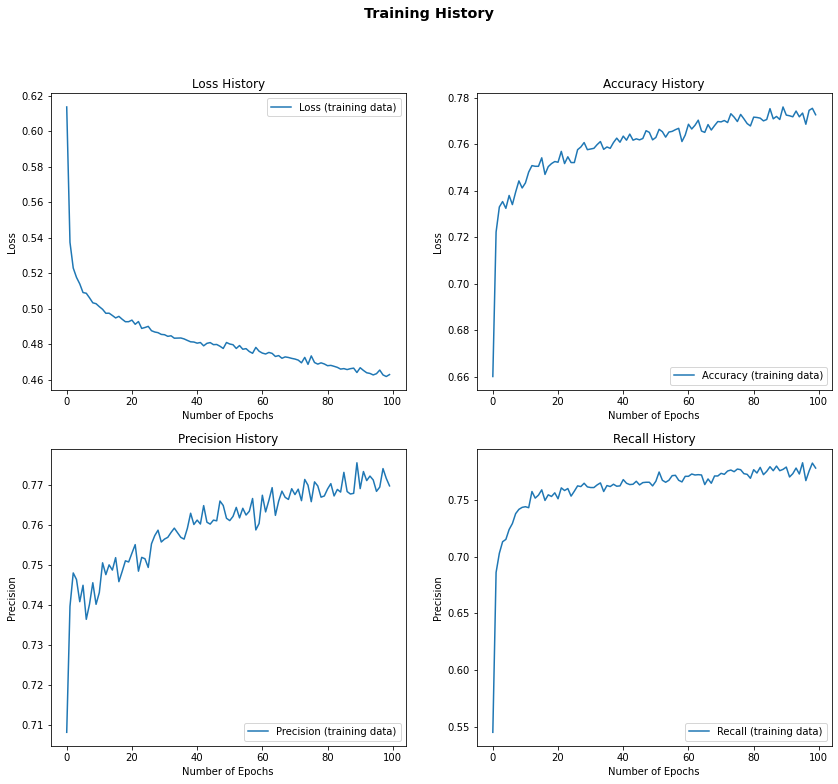

In [17]:
visualize_training_history(history)

### Model performance on train and test set

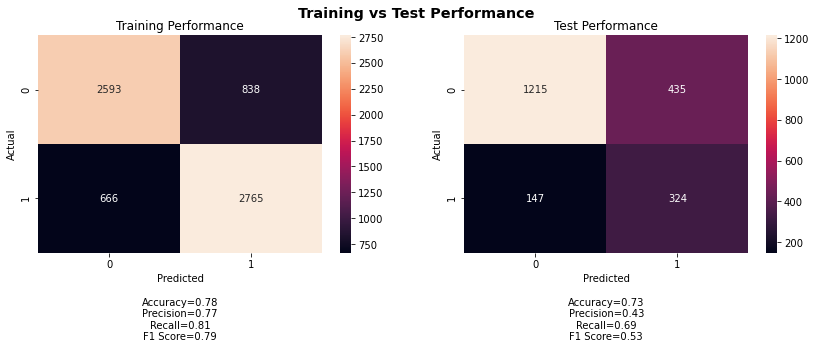

In [18]:
# Change probabilities to 0s and 1s
y_train_pred = (model.predict(X_train) >= 0.5).astype('int64')
y_test_pred = (model.predict(X_test) >= 0.5).astype('int64')

accuracy, precision, recall, f1_score = visualize_performance(y_train, y_train_pred, 
                                                              y_test, y_test_pred)

# Save values
tests_performance['Test Accuracy'].append(('SMOTETomek', accuracy))
tests_performance['Test Precision'].append(('SMOTETomek', precision))
tests_performance['Test Recall'].append(('SMOTETomek', recall))
tests_performance['Test F1 Score' ].append(('SMOTETomek', f1_score))

## 4. Fourth Model (SMOTEENN Resampling)

### Data preparation

In [19]:
# Import and prepare dataset
train_df = pd.read_csv('datasets/smoteenn-train.csv', index_col=0)
train_df = train_df.drop(columns=['revenue'])

test_df = pd.read_csv('datasets/test.csv', index_col=0)
test_df = test_df.drop(columns=['decade_released', 'genres', 'revenue'])

# Split into X and y
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

# Standardize inputs
X_train, X_test = standardize(X_train, X_test)

### Create model

In [20]:
# Create NN model
model = create_model([16, 16, 16], input_dim=len(X_train[0]),
                     model_name='smoteenn-model')
model.summary()

Model: "smoteenn-model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 16)                96        
_________________________________________________________________
Dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
Dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
Output (Dense)               (None, 1)                 17        
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________


### Model training

In [21]:
history = model.fit(X_train, y_train, batch_size=16, epochs=100)
training_histories['SMOTEENN'] = history

Epoch 1/100
231/231 [==============================] - 1s 2ms/step - loss: 0.6306 - accuracy: 0.6708 - precision: 0.7984 - recall: 0.4866
Epoch 2/100
231/231 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7734 - precision: 0.8157 - recall: 0.7408
Epoch 3/100
231/231 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.7861 - precision: 0.8237 - recall: 0.7572
Epoch 4/100
231/231 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.7794 - precision: 0.8015 - recall: 0.7644
Epoch 5/100
231/231 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.8108 - precision: 0.8302 - recall: 0.8066
Epoch 6/100
231/231 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8033 - precision: 0.8142 - recall: 0.8107
Epoch 7/100
231/231 [==============================] - 1s 2ms/step - loss: 0.4202 - accuracy: 0.8033 - precision: 0.8199 - recall: 0.8085
Epoch 8/100
231/231 [=============

231/231 [==============================] - 0s 1ms/step - loss: 0.3648 - accuracy: 0.8291 - precision: 0.8441 - recall: 0.8198
Epoch 61/100
231/231 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.8205 - precision: 0.8319 - recall: 0.8283
Epoch 62/100
231/231 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.8152 - precision: 0.8247 - recall: 0.8273
Epoch 63/100
231/231 [==============================] - 0s 1ms/step - loss: 0.3873 - accuracy: 0.8187 - precision: 0.8272 - recall: 0.8287
Epoch 64/100
231/231 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8121 - precision: 0.8201 - recall: 0.8290
Epoch 65/100
231/231 [==============================] - 0s 1ms/step - loss: 0.3889 - accuracy: 0.8138 - precision: 0.8189 - recall: 0.8254
Epoch 66/100
231/231 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.8082 - precision: 0.8158 - recall: 0.8287
Epoch 67/100
231/231 [==================

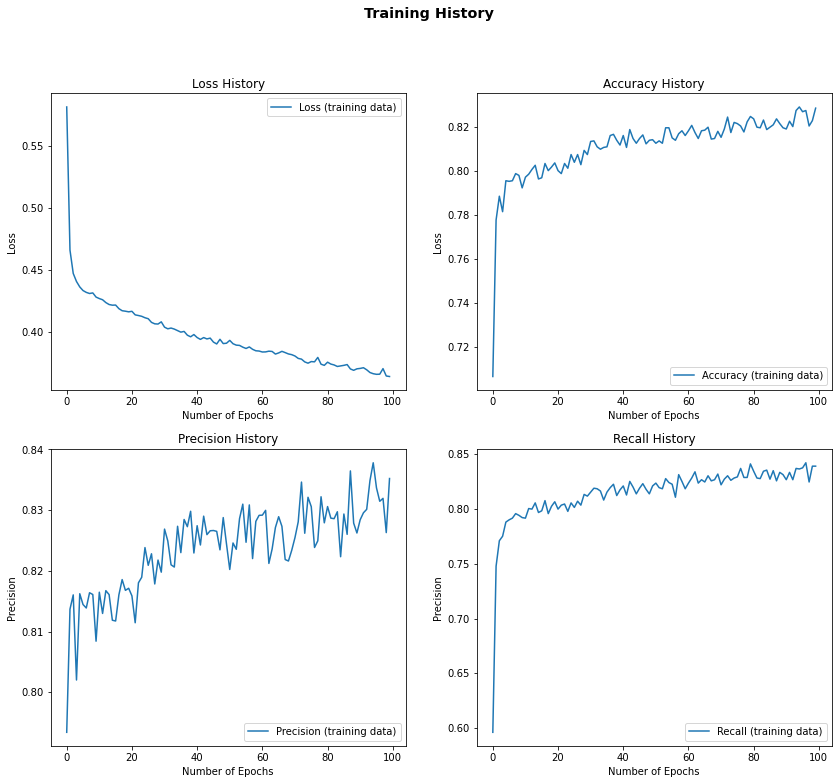

In [22]:
visualize_training_history(history)

### Model performance on train and test set

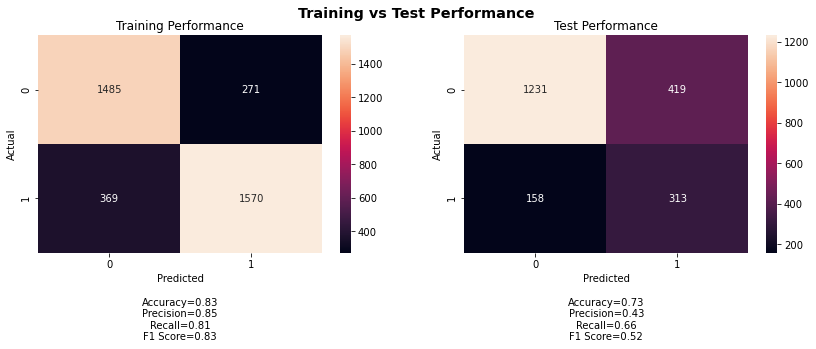

In [23]:
# Change probabilities to 0s and 1s
y_train_pred = (model.predict(X_train) >= 0.5).astype('int64')
y_test_pred = (model.predict(X_test) >= 0.5).astype('int64')

accuracy, precision, recall, f1_score = visualize_performance(y_train, y_train_pred, 
                                                              y_test, y_test_pred)

# Save values
tests_performance['Test Accuracy'].append(('SMOTEENN', accuracy))
tests_performance['Test Precision'].append(('SMOTEENN', precision))
tests_performance['Test Recall'].append(('SMOTEENN', recall))
tests_performance['Test F1 Score' ].append(('SMOTEENN', f1_score))

# Comparing performance between different resampling methods

## Performance on test set

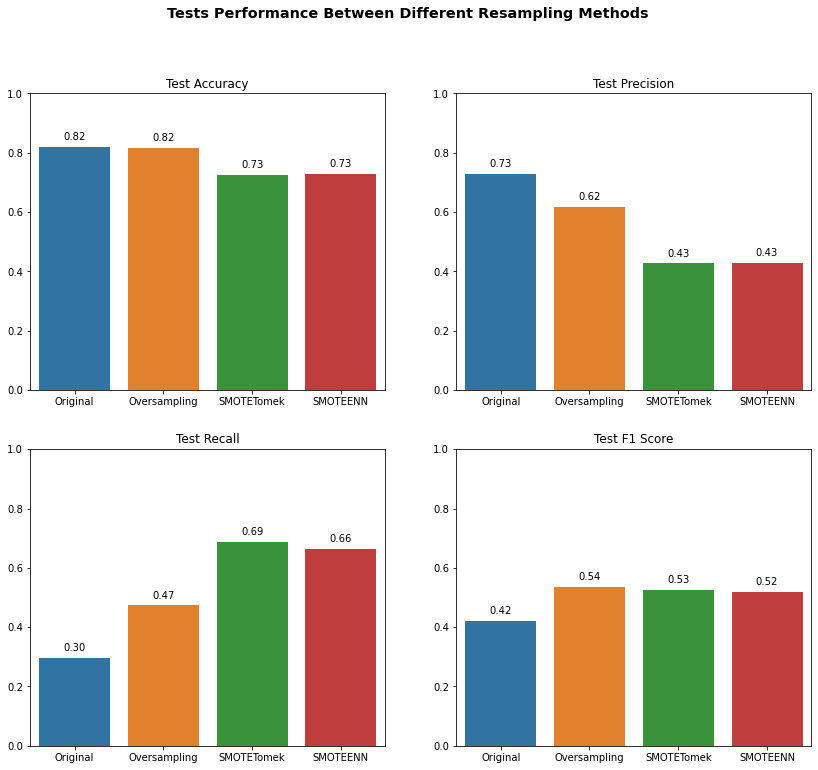

In [24]:
visualize_tests_performance(tests_performance)

## Training histories

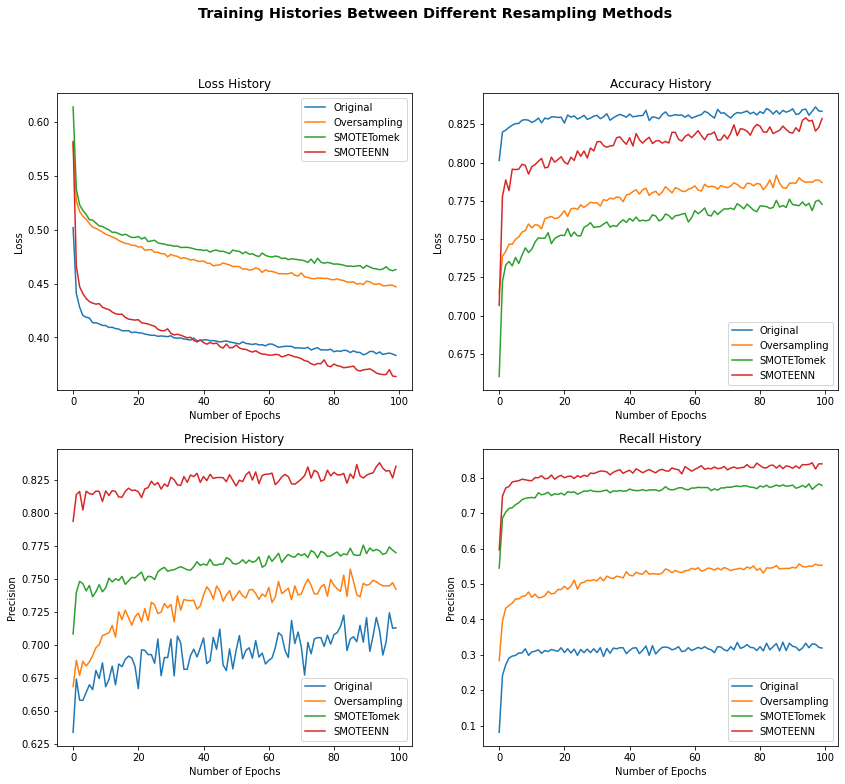

In [25]:
visualize_multiple_training_histories(training_histories)

# Comparing performance on test set multiple times
Since training neural networks are stochastic by design (different training, different results), we should not conclude the effectiveness of a resampling method by just doing a single test.

In [ ]:
# Redo the process multiple times and count the winners
winner_count = repeat_train_and_test(iterations=100)

# Save the result into a json file
with open('datasets/winner-data.json', 'w') as f:
    json.dump(winner_count, f)

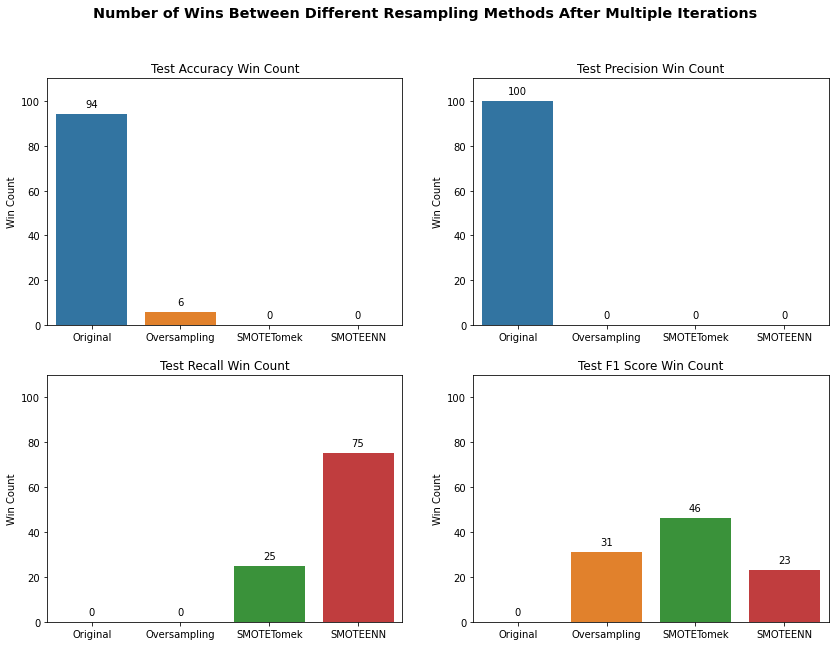

In [26]:
# Load json file
with open('datasets/winner-data.json') as f:
    winner_count = json.load(f)
    
visualize_winner_count(winner_count)

After many iterations, we can see that we should use SMOTEENN resampling method when we are trying to maximize recall.